## 課題９：二分法とNewton法を再帰関数で実装（recursive function）

In [ ]:
# 関数f：xの値が与えられたらf(x)を計算して返す。
# a: 方程式の係数が次数の高いもの順に格納されている配列
def f (x, a):
  # order_n: 次数
  order_n = len(a)-1
  answer = 0
  for i in range(len(a)):
    answer += a[i]*(x**(order_n - i))
  return answer

In [ ]:
# 関数derivative_f：xにおける傾きを返す。
# a: 方程式の係数が次数の高いもの順に格納されている配列
def derivative_f (x, a):
  # order_n: 次数
  order_n = len(a)-1
  answer = 0.0
  for i in range(len(a)-1):
    answer += (order_n - i) * a[i] * (x**(order_n - i - 1))
  return answer

### 関数定義(再帰関数の場合)

In [ ]:
# 二分法によって方程式を解く関数
def bisection (a, b):
  # coefficient: 方程式の係数
  # r: y座標が r のときのx座標を求める。方程式の解なので、f(x)=0となるようなxを求めたい。したがって、今回は r=0 としている。
  # eps: 方程式の真の解との誤差をどのくらい許容するか。f(x)<r±eps となるときのxを求めることになる。
  coefficient = [0.2, -0.2, -0.8, 0.6, 0.6, -0.1]
  r = 0.0
  eps = 0.000001
  
  # 二分法によって方程式を解く上で、初期値a0,b0の値が正しく設定されていなければエラーとし、処理を終える。
  # f(a)>r and f(b)<r もしくは f(a)<r and f(b)>r となるような初期値a0,b0を設定しなければならない。
  ya = f(a, coefficient)
  yb = f(b, coefficient)
  if ya<r and yb<r:
    print("error: f(a)<r and f(b)<r")
    return
  elif ya>r and yb>r:
    print("error: f(a)>r and f(b)>r")
    return

  # ‐二分法‐
  # a,bの中点をcとしたとき、f(c)がr以上なら、f(a),f(b)のうちr以上の方を中点まで移動させる。
  # f(c)がr以下なら、f(a),f(b)のうちr以下の方を中点cまで移動させる。
  # これを、中点cのy座標がr±epsとなるまで続ける。
  # 二分法で解くと、ちょうどf(x)=rとなることはあまりないため、epsだけ誤差を認めて、r-eps < f(x) < r+eps となるときのxを求める。
  # したがって、再帰関数で解く場合は、その条件を満たすまで二分法によって解を求めるようにする。(ベースケース：abs(r-y) <= eps)
  y = f((a+b)/2, coefficient)
  if abs(r-y) <= eps:
    return (a+b)/2

  # ベースケースの条件を満たさなければ、二分法のプロセスを進める。
  elif y<0:
    if ya<0:
      a = (a+b)/2
    elif ya>0:
      b = (a+b)/2
  elif y>0:
    if ya<0:
      b = (a+b)/2
    elif ya>0:
      a = (a+b)/2
  return bisection(a, b)

In [ ]:
# Newton法：以下を何回か繰り返して、ある数値の近似値を求めるアルゴリズム。繰り返しが終わった時のaが答え。
#           ① f(x)の x=a における接線を求める。
#           ② 求めた接線と 直線y = r との交点のx座標を次のaとする。

# 今回は方程式f(x)が f(x)=r=0 となるときの x の近似値。(0-eps < f(x) < 0+eps となるときのx)
# newton_method: newton法によって方程式を解く関数
# a: 初期値
def newton_method (a):
  # coefficient: 方程式の係数
  # r: y座標が r のときのx座標を求める
  # eps: 方程式の真の解との誤差をどのくらい許容するか。
  coefficient = [0.2, -0.2, -0.8, 0.6, 0.6, -0.1]
  r = 0.0
  eps=0.000001

  y = f(a, coefficient)
  if abs(r-y) <= eps:
    return a
  
  else:
    # ① f(x)の x=a における接線を求める。
    x = a
    y = f(x, coefficient)
    # gt: gradient_of_tangents。接線の傾き。
    # intercept: 接線の切片
    # y = gt * x + intercept → intercept = y - gt * x
    gt = derivative_f(x, coefficient)
    intercept = y - gt*x

    # ② 求めた接線y = gt * x + intercept と 直線y = r との交点のx座標を次のaとする。
    # r = gt * x + intercept → x = (r - intercept) / gt
    # 接線の傾きが0だと交点がないので、少しずらす。
    if gt == 0.0:
      gt += 0.5;
    a = (r - intercept) / gt

    return newton_method(a)

In [ ]:
def solves_to_equation_bisection (a0_list, b0_list):
  answer = []
  for a0, b0 in zip(a0_list, b0_list):
    answer.append(bisection(a0, b0))
  return answer

In [ ]:
def solves_to_equation_newton (a0_list):
  answer = []
  for a0 in a0_list:
    answer.append(newton_method(a0))
  return answer

### 関数定義(while文を使った関数の場合)

In [ ]:
# 二分法によって方程式を解く関数
def bisection_while (a0_list, b0_list):
  # coefficient: 方程式の係数
  # r: y座標が r のときのx座標を求める。方程式の解なので、f(x)=0となるようなxを求めたい。したがって、今回は r=0 としている。
  # eps: 方程式の真の解との誤差をどのくらい許容するか。f(x)<r±eps となるときのxを求めることになる。
  coefficient = [0.2, -0.2, -0.8, 0.6, 0.6, -0.1]
  r = 0.0
  eps = 0.000001

  answer = []
  for a, b in zip(a0_list, b0_list):
    # 二分法によって方程式を解く上で、初期値a0,b0の値が正しく設定されていなければエラーとし、処理を終える。
    # f(a)>0 and f(b)<0 もしくは f(a)<0 and f(b)>0 となるような初期値a0,b0を設定しなければならない。
    ya = f(a, coefficient)
    yb = f(b, coefficient)
    if ya<0 and yb<0:
      print("error: f(a)<0 and f(b)<0")
      return
    elif ya>0 and yb>0:
      print("error: f(a)>0 and f(b)>0")
      return
    
    # ‐二分法‐
    # a,bの中点をcとしたとき、f(c)が0以上なら、f(a),f(b)のうち0以上の方を中点まで移動させる。
    # f(c)が0以下なら、f(a),f(b)のうち0以下の方を中点まで移動させる。
    # これを、中点のyが0±epsとなるまで続ける。
    y = f((a+b)/2, coefficient)
    # 方程式の解なので、f(x)=0となるようなxを求めたい。
    # しかし、二分法で解くと、ちょうどf(x)=0となることはあまりないため、epsだけ誤差を認めて、f(x)<0±eps となるときのxを求める。
    while (abs(y)>eps):
      if y<0:
        if ya<0:
          a = (a+b)/2
        elif ya>0:
          b = (a+b)/2
      elif y>0:
        if ya<0:
          b = (a+b)/2
        elif ya>0:
          a = (a+b)/2
      y = f((a+b)/2, coefficient)
    answer.append((a+b)/2)

  return answer

In [ ]:
# Newton法：以下を何回か繰り返して、ある数値の近似値を求めるアルゴリズム。繰り返しが終わった時のaが答え。
#           ① f(x)の x=a における接線を求める。
#           ② 求めた接線と 直線y = r との交点のx座標を次のaとする。


# 今回は方程式f(x)が f(x)=r=0 となるときの x の近似値。(0-eps < f(x) < 0+eps となるときのx)
# newton_method: newton法によって方程式を解く関数
# a: 初期値
def newton_method_while (a0_list):
  # coefficient: 方程式の係数
  # r: y座標が r のときのx座標を求める
  # eps: 方程式の真の解との誤差をどのくらい許容するか。
  coefficient = [0.2, -0.2, -0.8, 0.6, 0.6, -0.1]
  r = 0.0
  eps=0.000001

  answer = []
  for a in a0_list:
    y = f(a, coefficient)
    while (abs(r-y)>eps):
      # ① f(x)の x=a における接線を求める。
      x = a
      y = f(x, coefficient)
      # gt: gradient_of_tangents。接線の傾き。
      # intercept: 接線の切片
      # y = gt * x + intercept → intercept = y - gt * x
      gt = derivative_f(x, coefficient)
      intercept = y - gt*x

      # ② 求めた接線y = gt * x + intercept と 直線y = r との交点のx座標を次のaとする。
      # r = gt * x + intercept → x = (r - intercept) / gt
      # 接線の傾きが0だと交点がないので、少しずらす。
      if gt == 0.0:
        gt += 0.5;
      a = (r - intercept) / gt
      y = f(a, coefficient)
    answer.append(a)

  return answer

### 関数呼び出し

In [ ]:
INIT_VAL_A = [-2.0, -1.5, -0.5, 0.5, 1.5]
INIT_VAL_B = [-1.5, -0.5, 0.5, 1.5, 2.0]

In [ ]:
# 二分法の関数（再帰関数）によって、方程式の解を求める。
answer = solves_to_equation_bisection(INIT_VAL_A, INIT_VAL_B)
print(answer)

[-1.7086071968078613, -0.7354965209960938, 0.14901351928710938, 1.4369659423828125, 1.8581247329711914]


In [ ]:
# 二分法の関数（while文）によって、方程式の解を求める。
answer = bisection_while(INIT_VAL_A, INIT_VAL_B)
print(answer)

[-1.7086071968078613, -0.7354965209960938, 0.14901351928710938, 1.4369659423828125, 1.8581247329711914]


In [ ]:
INIT_VAL = [-1.7, -1.0, 0.0, 1.5, 2.0]

In [ ]:
# ニュートン法の関数（再帰関数）によって、方程式の解を求める。
answer = solves_to_equation_newton(INIT_VAL)
print(answer)

[-1.7086071996343235, -0.7354974419186893, 0.14901333984791312, 1.4369664289160546, 1.858124815085634]


In [ ]:
# ニュートン法の関数（while文）によって、方程式の解を求める。
answer = newton_method_while(INIT_VAL)
print(answer)

[-1.7086071996343235, -0.7354974419186893, 0.14901333984791312, 1.4369664289160546, 1.858124815085634]


### memo

In [ ]:
INIT_VAL_A = [-1.0, -1.0, -0.5]
INIT_VAL_B = [1.5, -0.5, 0.5]

In [ ]:
# 方程式の解を求める。
answer = solves_to_equation_bisection(INIT_VAL_A, INIT_VAL_B)
print(answer)

[1.2648298740386963, -0.6637277603149414, 0.1488971710205078]


In [ ]:
INIT_VAL = [-1.0, 0.0, 1.0]

In [ ]:
# 方程式の解を求める。
answer = solves_to_equation_newton(INIT_VAL)
print(answer)

[-0.6637279187534769, 0.14889767129509773, 1.2648300360443596]


## 課題８：Newton法（Newton Method）

In [ ]:
# 関数f：xの値が与えられたらf(x)を計算して返す。
# a: 方程式の係数が次数の高いもの順に格納されている配列
def f (x, a):
  # order_n: 次数
  order_n = len(a)-1
  answer = 0
  for i in range(len(a)):
    answer += a[i]*(x**(order_n - i))
  return answer

In [ ]:
# 関数derivative_f：xにおける傾きを返す。
# a: 方程式の係数が次数の高いもの順に格納されている配列
def derivative_f (x, a):
  # order_n: 次数
  order_n = len(a)-1
  answer = 0.0
  for i in range(len(a)-1):
    answer += (order_n - i) * a[i] * (x**(order_n - i - 1))
  return answer

In [ ]:
# Newton法：以下を何回か繰り返して、ある数値の近似値を求めるアルゴリズム。繰り返しが終わった時のaが答え。
#           ① f(x)の x=a における接線を求める。
#           ② 求めた接線と 直線y = r との交点のx座標を次のaとする。

# 今回は方程式f(x)が f(x)=r=0 となるときの x の近似値。(0-eps < f(x) < 0+eps となるときのx)
# newton_method: newton法によって方程式を解く関数
# coefficient: 方程式の係数
# r: y座標が r のときのx座標を求める
# a: 初期値
# eps: 方程式の真の解との誤差をどのくらい許容するか。
def newton_method (coefficient, r, a, eps=0.000001):
  # i: ループ回数をカウントする変数
  i = 0
  y = f(a, coefficient)
  while (abs(r-y)>eps):
    # ① f(x)の x=a における接線を求める。
    x = a
    y = f(x, coefficient)
    # gt: gradient_of_tangents。接線の傾き。
    # intercept: 接線の切片
    # y = gt * x + intercept → intercept = y - gt * x
    gt = derivative_f(x, coefficient)
    intercept = y - gt*x

    # ② 求めた接線y = gt * x + intercept と 直線y = r との交点のx座標を次のaとする。
    # r = gt * x + intercept → x = (r - intercept) / gt
    # 接線の傾きが0だと交点がないので、少しずらす。
    if gt == 0.0:
      gt += 0.5;
    a = (r - intercept) / gt
    y = f(a, coefficient)

    # ループ回数をカウント
    i += 1

  # ループ回数を出力
  print(i)
  return a

In [ ]:
# coefficient: 方程式の係数
# r: 方程式のy座標が r のときのx座標を求める
coefficient = [-0.8, 0.6, 0.6, -0.1]
r = 0

In [ ]:
# ３次方程式の解３つのうち、１つを求める。
a0 = -1.0
answer = newton_method(coefficient, r, a0)
print(answer)

5
-0.6637277041161742


In [ ]:
# ３次方程式の解、残りの２つのうち１つを求める。
a0 = 0.0
answer = newton_method(coefficient, r, a0)
print(answer)

4
0.14889766845186328


In [ ]:
# ３次方程式の解の残りの１つを求める。
a0 = 1.0
answer = newton_method(coefficient, r, a0)
print(answer)

6
1.2648300356642304


In [ ]:
# -2 < x < +2 の範囲で解の算出にループ回数が50回以上かかるような初期値。
a0 = 10**9
answer = newton_method(coefficient, r, a0, 2.0)
print(answer)

52
1.337176169765065


### memo

In [ ]:
coefficient = [1, 0, 0]
r = 2

In [ ]:
a0 = 2.0
answer = newton_method(coefficient, r, a0)
print(answer)

5
1.414213562373095


In [ ]:
a0 = 0.0
answer = newton_method(coefficient, r, a0)
print(answer)

7
1.414213562373095


In [ ]:
coefficient = [1, 0, 0]
r = 0

In [ ]:
a0 = 0.0
answer = newton_method(coefficient, r, a0)
print(answer)

0
0.0


## 課題７：二分法（bisection）

In [ ]:
# 関数f：xの値が与えられたらf(x)を計算して返す。
def f (x, a=-0.8, b=0.6, c=0.6, d=-0.1):
  return a*(x**3) + b*(x**2) + c*x + d

In [ ]:
# 二分法によって方程式を解く関数
# eps: 方程式の真の解との誤差をどのくらい許容するか。f(x)<0±eps となるときのxを求めることになる。
def bisection (a, b, eps=0.000001):
  # 二分法によって方程式を解く上で、初期値a0,b0の値が正しく設定されていなければエラーとし、処理を終える。
  # f(a)>0 and f(b)<0 もしくは f(a)<0 and f(b)>0 となるような初期値a0,b0を設定しなければならない。
  ya = f(a)
  yb = f(b)
  if ya<0 and yb<0:
    print("error: f(a)<0 and f(b)<0")
    return
  elif ya>0 and yb>0:
    print("error: f(a)>0 and f(b)>0")
    return
  
  # ‐二分法‐
  # a,bの中点をcとしたとき、f(c)が0以上なら、f(a),f(b)のうち0以上の方を中点まで移動させる。
  # f(c)が0以下なら、f(a),f(b)のうち0以下の方を中点まで移動させる。
  # これを、中点のyが0±epsとなるまで続ける。
  y = f((a+b)/2)
  # 方程式の解なので、f(x)=0となるようなxを求めたい。
  # しかし、二分法で解くと、ちょうどf(x)=0となることはあまりないため、epsだけ誤差を認めて、f(x)<0±eps となるときのxを求める。
  while (abs(y)>eps):
    if y<0:
      if ya<0:
        a = (a+b)/2
      elif ya>0:
        b = (a+b)/2
    elif y>0:
      if ya<0:
        b = (a+b)/2
      elif ya>0:
        a = (a+b)/2
    y = f((a+b)/2)
  return (a+b)/2

In [ ]:
# ３次方程式の解３つのうち、１つを求める。
a0 = -1.0
b0 = 1.5
x_result = bisection(a0, b0)
print(x_result)

1.2648298740386963


In [ ]:
# ３次方程式の解、残りの２つのうち１つを求める。
a0 = -1.0
b0 = -0.5
x_result = bisection(a0, b0)
print(x_result)

-0.6637277603149414


In [ ]:
# ３次方程式の解の残りの１つを求める。
a0 = -0.5
b0 = 0.5
x_result = bisection(a0, b0)
print(x_result)

0.1488971710205078


## 課題６：モンテカルロ法（Monte Carlo Approach）

In [ ]:
# 可視化、データ処理のライブラリをインポート
import matplotlib.pyplot as plt
import numpy as np

### 問題１（中心極限定理）

In [ ]:
# n：試行回数
# list1：1個の一様乱数を１万個格納
# mean_list10：10個の一様乱数の平均値を１万個格納
# mean_list50：50個の一様乱数の平均値を１万個格納
# mean_list100：100個の一様乱数の平均値を１万個格納
n = 10000
list1 = []
mean_list10 = []
mean_list50 = []
mean_list100 = []

In [ ]:
# for文内の処理をn回繰り返す
for i in range(n):
    # 一様分布の母集団から1個の標本を抽出
    list1.append(np.random.random_sample())

    # 一様分布の母集団から10個の標本を抽出
    arr_10 = np.random.random_sample(10)
    # 平均を算出してリストに追加
    mean_list10.append(arr_10.mean())

    # 一様分布の母集団から50個の標本を抽出
    arr_50 = np.random.random_sample(50)
    # 平均を算出してリストに追加
    mean_list50.append(arr_50.mean())

    # 一様分布の母集団から100個の標本を抽出
    arr_100 = np.random.random_sample(100)
    # 平均を算出してリストに追加
    mean_list100.append(arr_100.mean())

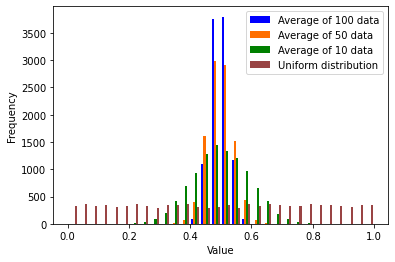

In [ ]:
# x軸を値、y軸を出現頻度として、４つのリストのデータを可視化。
plt.hist([mean_list100, mean_list50, mean_list10, list1], bins=30, color=['b', '#ff6f00', 'g', '#994444'], label=['Average of 100 data', 'Average of 50 data', 'Average of 10 data', 'Uniform distribution'])

# x,y軸のラベルを表示
plt.xlabel("Value")
plt.ylabel("Frequency")
# 凡例を右上に配置
plt.legend(loc="upper right")
plt.show()

### 問題２（モンテカルロ法による円周率の近似）

In [ ]:
# r：半径
# N：試行回数
# N1：円の中に入った乱数の個数
# N2：ランダムな点の個数
# result_pi：試行回数ごとの円周率の予測値
r = 1
N = 100000
N1 = 0
N2 = 0
result_pi = []

In [ ]:
# 10万回ランダムに点を取り、それぞれが半径rの円の内側に入るかどうかを判定し、
# 入っていればN1とN2をプラス１、入っていなければN2のみをプラス１。（N2はランダムな点の個数なので、円に入ってるか入ってないかに関わらずプラス１）
for i in range(N):
    # ランダムに点pをとる
    p = np.random.rand(2)
    # 円の中心O(0,0)と点p(x,y)の距離：(x^2+y^2)^(1/2)
    # x = p[0], y = p[1]　なので
    # 半径rの円の内側に入る場合
    if (p[0]**2+p[1]**2)**0.5 < r:
        N1 = N1+1
        N2 = N2+1
    # 半径rの円の外側に入る場合
    else:
        N2 = N2+1
    # 各試行ごとに円周率の予測値を算出
    result_pi.append(4*N1/N2)

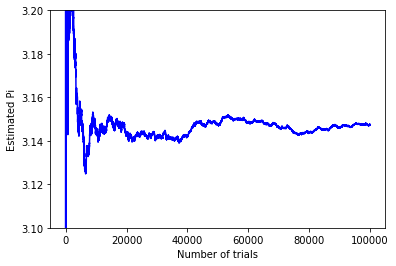

In [ ]:
# x軸を試行回数、y軸を円周率の予測値として、データを可視化。
plt.plot(result_pi, color = 'blue', linestyle='solid')
# x,y軸のラベルを表示
plt.xlabel('Number of trials')
plt.ylabel('Estimated Pi')
# 変化が見やすいようにy軸の幅を指定
plt.ylim(3.1,3.2)
plt.show()

In [ ]:
# 10万回目の試行での円周率の予測値
result_pi[-1]

3.1474

## 課題５：可視化（純利益など）

In [ ]:
# Google Drive をマウント
from google.colab import drive
drive.mount("/content/drive")
!ls
%cd './drive/MyDrive/Kamo_Programming'
!ls

Mounted at /content/drive
drive  sample_data
/content/drive/MyDrive/Kamo_Programming
completed_tasks  data_11_14.csv  toyota.csv  課題.ipynb


In [ ]:
# 可視化、データ処理のライブラリをインポート
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# データの読み込み(ndarrayとして読み込み)
# 今回のデータは、csvファイル(区切り文字がカンマ)なので、delimiter=',' を指定。(カンマでデータを区切って読み込む)
# tsvファイル(タブ区切り)なら delimiter='\t' を指定する。
# 後のデータ処理を効率的にするため、numpyのT属性を使って、読み込んだデータ(行列)の行と列を入れ替えたデータ(転置行列)を取得。転置：行と列の入れ替え。
reader = np.loadtxt("toyota.csv", delimiter=',').T

In [ ]:
# 読み込んだデータを、営業期・純利益・資本に分ける。
period = []
net_sales = []
equity = []

period = reader[0]
net_sales = reader[5]
equity = reader[6]

In [ ]:
# ROEを算出するため、純利益を資本で割って100をかける
roe = 100 * net_sales/equity

In [ ]:
# x軸を営業期、y軸をROEとして、データを可視化。
plt.plot(period, roe, label='ROE')
# タイトル、x,y軸のラベルを表示
plt.xlabel("Business period")
plt.ylabel("Return on equity (%)")
# 凡例を右上に配置
plt.legend(loc="upper right")
plt.show()

NameError: ignored

### メモ

In [ ]:
# 読み込んだデータを、営業期・売上高・営業利益・経常利益・税引前利益・純利益・資本に分ける。
period = []
sales = []
ope_income = []
ord_income = []
income_bef_taxes = []
net_sales = []
equity = []

period = reader[0]
sales = reader[1]
ope_income = reader[2]
ord_income = reader[3]
income_bef_taxes = reader[4]
net_sales = reader[5]
equity = reader[6]

NameError: ignored

## 課題４：じゃんけんの勝敗を判定する関数

In [ ]:
# 乱数を生成するrandomモジュールをインポート
import random

In [ ]:
# じゃんけんの勝敗を判定する関数
# plaerとNPCの出した手をint型の引数で受け取り、結果を文字列で返す
# ・じゃんけんの勝敗判定 
# 　(自分の手 - 相手の手 + 3) % 3　の結果が...
# 　0 → 引き分け
# 　1 → 勝ち
# 　2 → 負け
def judge(player: int, npc: int) -> str:
  judge = (player - npc + 3) % 3
  if judge == 0:
    return "draw"
  elif judge == 1:
    return "You win!"
  else:
    return "NPC win..."

# # and, or を使用した、じゃんけんの勝敗を判定する関数
# def judge(player: int, npc: int) -> str:
#   if player==npc:
#     return "draw"
#   elif player==0 and npc==1:
#     return "NPC win..."
#   elif player==1 and npc==2:
#     return "NPC win..."
#   elif player==2 and npc==0:
#     return "NPC win..."
#   else:
#     return "You win!"

In [ ]:
hand = ['Rock', 'Paper', 'Scissors']

In [ ]:
# 相手の手をランダムに決定
# 0～2の整数の中から１つの整数をランダムに取得
npc = random.randint(0, 2)

In [ ]:
print('Please input a number to play')
print('0: Rock, 1: Paper, 2: Scissors')
player = int(input())
print('You chose', hand[player])
print('NPC chose', hand[npc])
print(judge(player, npc))

Please input a number to play
0: Rock, 1: Paper, 2: Scissors
0
You chose Rock
NPC chose Scissors
You win!


In [ ]:
print('Please input a number to play')
print('0: Rock, 1: Paper, 2: Scissors')
player = int(input())
print('You chose', hand[player])
print('NPC chose', hand[npc])
print(judge(player, npc))

Please input a number to play
0: Rock, 1: Paper, 2: Scissors
1
You chose Paper
NPC chose Scissors
NPC win...


In [ ]:
print('Please input a number to play')
print('0: Rock, 1: Paper, 2: Scissors')
player = int(input())
print('You chose', hand[player])
print('NPC chose', hand[npc])
print(judge(player, npc))

Please input a number to play
0: Rock, 1: Paper, 2: Scissors
2
You chose Scissors
NPC chose Scissors
draw


## 課題３：可視化（日本語）

In [ ]:
# Google Drive をマウント
from google.colab import drive
drive.mount("/content/drive")
!ls
%cd './drive/MyDrive/Kamo_Programming'
!ls

Mounted at /content/drive
drive  sample_data
/content/drive/MyDrive/Kamo_Programming
data		data.csv	task_10_24.ipynb  Untitled2.zip
data_10_24.csv	previous_codes	Untitled2.ipynb   課題.ipynb


In [ ]:
# 日本語をグラフ内の文字で使えるようにライブラリをインストール
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 5.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=9424e3e23fc3886a3cccb7ac94d024fdb87d0cbc6604fdb5e45f7c2575d36e5e
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
# 可視化、データ処理のライブラリをインポート
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

In [ ]:
# データの読み込み
data = pd.read_csv("data_10_24.csv", header=None)

In [ ]:
# ここは含めなくて OK
# reader = pd.read_csv("data_10_24.csv", header=None)
# data = reader[(reader[0]>=1950)&(reader[0]<=1990)]

In [ ]:
# 分かりやすいように、調査年・男子のデータ・女子のデータの配列をそれぞれ作る。
year = data[0]
men_ave = data[1]
women_ave = data[2]

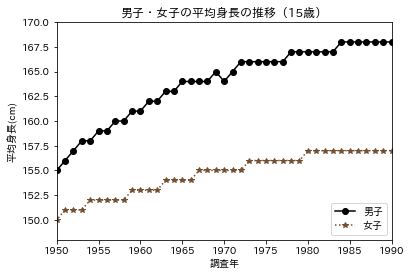

In [ ]:
# x軸を調査年、y軸を平均身長として、男子・女子それぞれのデータを可視化。
# 男子：黒色・丸マーカー。
# 女子：茶色・星マーカー。色の指定には16進法の表記を利用。
plt.plot(year, men_ave, linestyle='-', color='black', marker='o', label='男子')
plt.plot(year, women_ave, linestyle=':', color='#734e30', marker='*', label='女子')

# タイトル、x,y軸のラベルを表示
plt.title("男子・女子の平均身長の推移（15歳）")
plt.xlabel("調査年")
plt.ylabel("平均身長(cm)")
# 1950～1990年のデータのみ表示
plt.xlim(1950,1990)
# 凡例を右下に配置
plt.legend(loc="lower right")
plt.show()

## 課題２：可視化

### 解法１（手本に沿って解答）

In [ ]:
# Google Drive をマウント
from google.colab import drive
drive.mount("/content/drive")
!ls
%cd './drive/MyDrive/Kamo_Programming'
!ls

In [ ]:
# 可視化とデータ処理のライブラリをインポート
import matplotlib.pyplot as plt
import csv

In [ ]:
# ファイルの読み込み
f = open('data.csv', mode='r')
reader = csv.reader(f)

In [ ]:
x = []
y1 = []
y2 = []
y3 = []

for line in reader:
   x.append(int(line[0]))
   y1.append(int(line[1]))
   y2.append(int(line[2]))
   # y2 - y1 の結果を y3 に入れる
   y3.append(int(line[2])-int(line[1]))

# 読み込んだファイルを閉じる
f.close()

In [ ]:
# データの可視化
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

### 解法２（手本と違うからワンチャン怪しまれるけど、自分ならこうやる）

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!ls
%cd './drive/MyDrive/Kamo_Programming'
!ls

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
reader = pd.read_csv("data.csv", header=None)

In [ ]:
x = []
y1 = []
y2 = []
y3 = []

x = reader[0]
y1 = reader[1]
y2 = reader[2]

for y_1, y_2 in zip(y1, y2):
  y3.append(y_2 - y_1)

In [ ]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

## 課題１：inch→cm

In [ ]:
def inch2cm (inches=1):
    cm = inches * 2.54;
    return cm

print(inch2cm(5))
print(inch2cm())

12.7
2.54
